 # Compare ITS

Text(0.5, 1.12, 'ACTR')

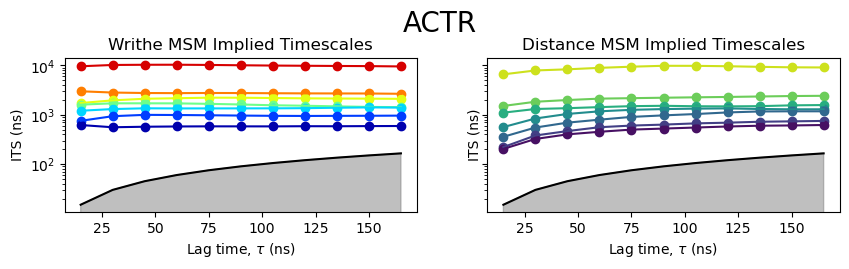

In [315]:
n_its = 7
fig,axes = plt.subplots(1,2, figsize=(10,2), sharey=True)
ax = axes.flat
msm.its("msm", cmap="jet", ax=ax[0], n_its=n_its)
ax[0].set_title("Writhe MSM Implied Timescales")
dist_msm.its("msm", ax=ax[1], n_its=n_its)
ax[1].set_title("Distance MSM Implied Timescales")
fig.suptitle(f"{protein_name}", y=1.12, size = 20)

 # Estimate coarse grained models 

In [ ]:
n_macro_states = 9
msm_lag = 8
# estimate distance MSM
dist_msm = MarkovModel(dist_dtraj).estimate_msm(lag=msm_lag, steps=5)
msm=MarkovModel(dtraj).estimate_msm(lag=msm_lag, steps=5)
msm.estimate_hmm(n_macro_states).estimate_pcca(n_macro_states)
dist_msm.estimate_hmm(n_macro_states).estimate_pcca(n_macro_states)
;

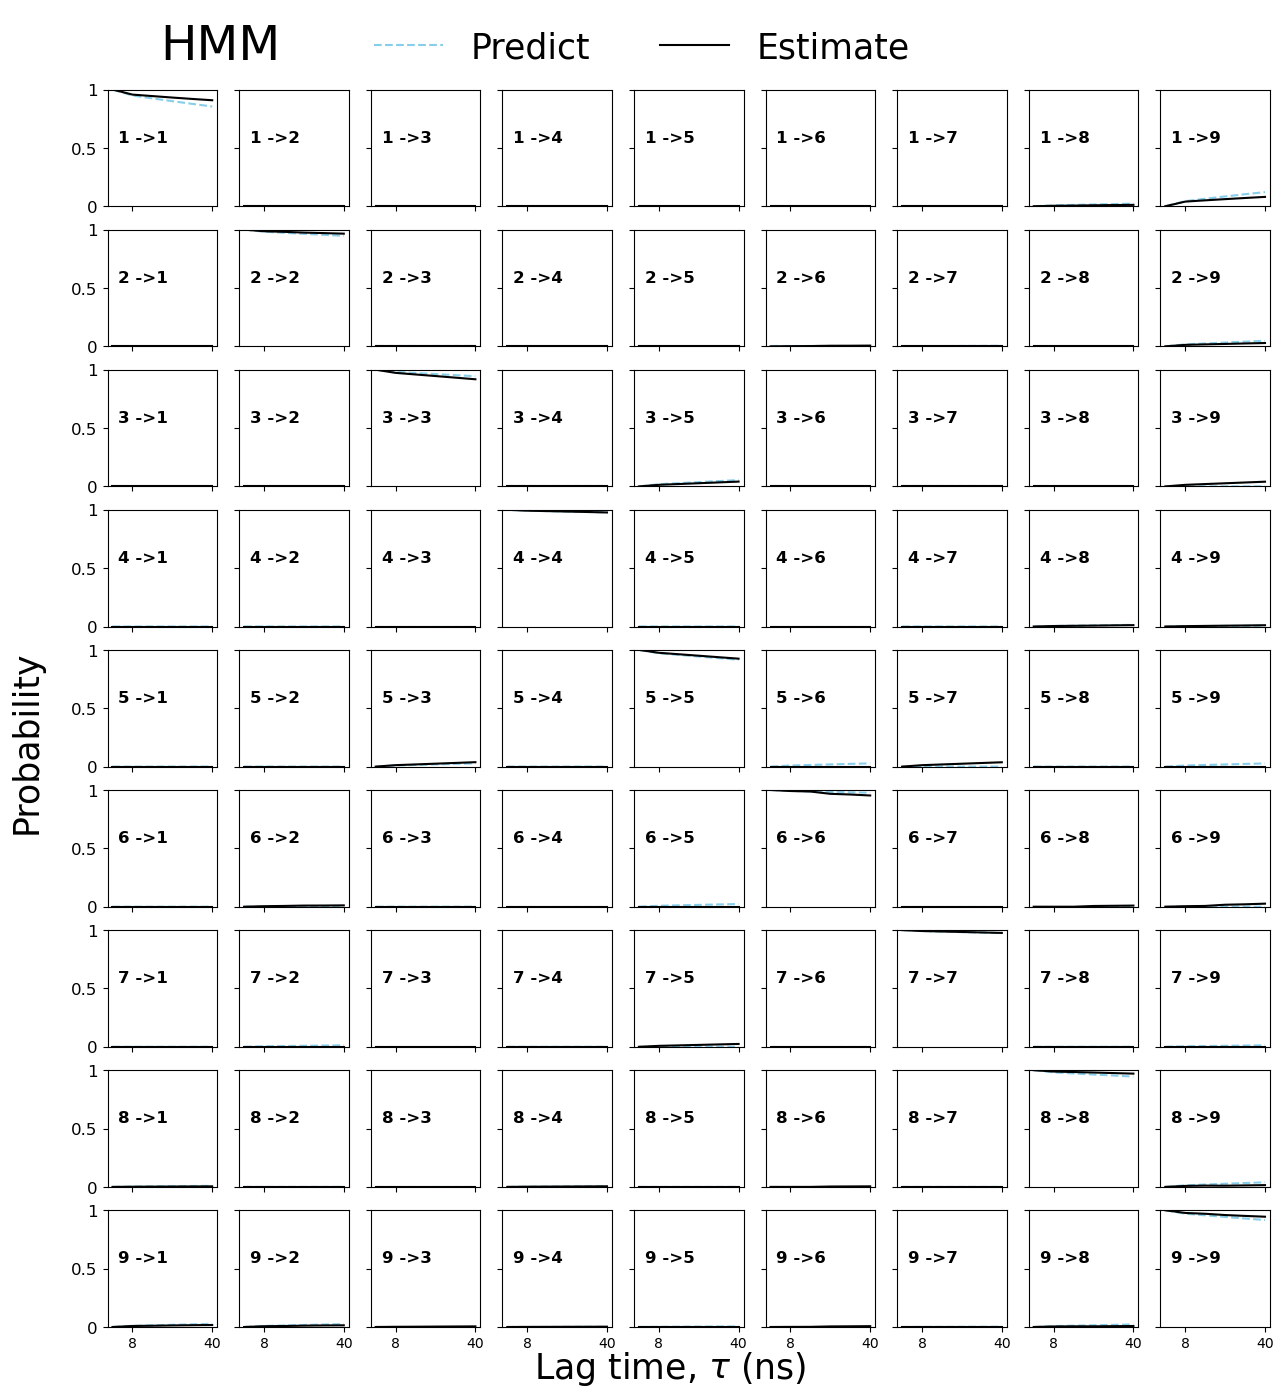

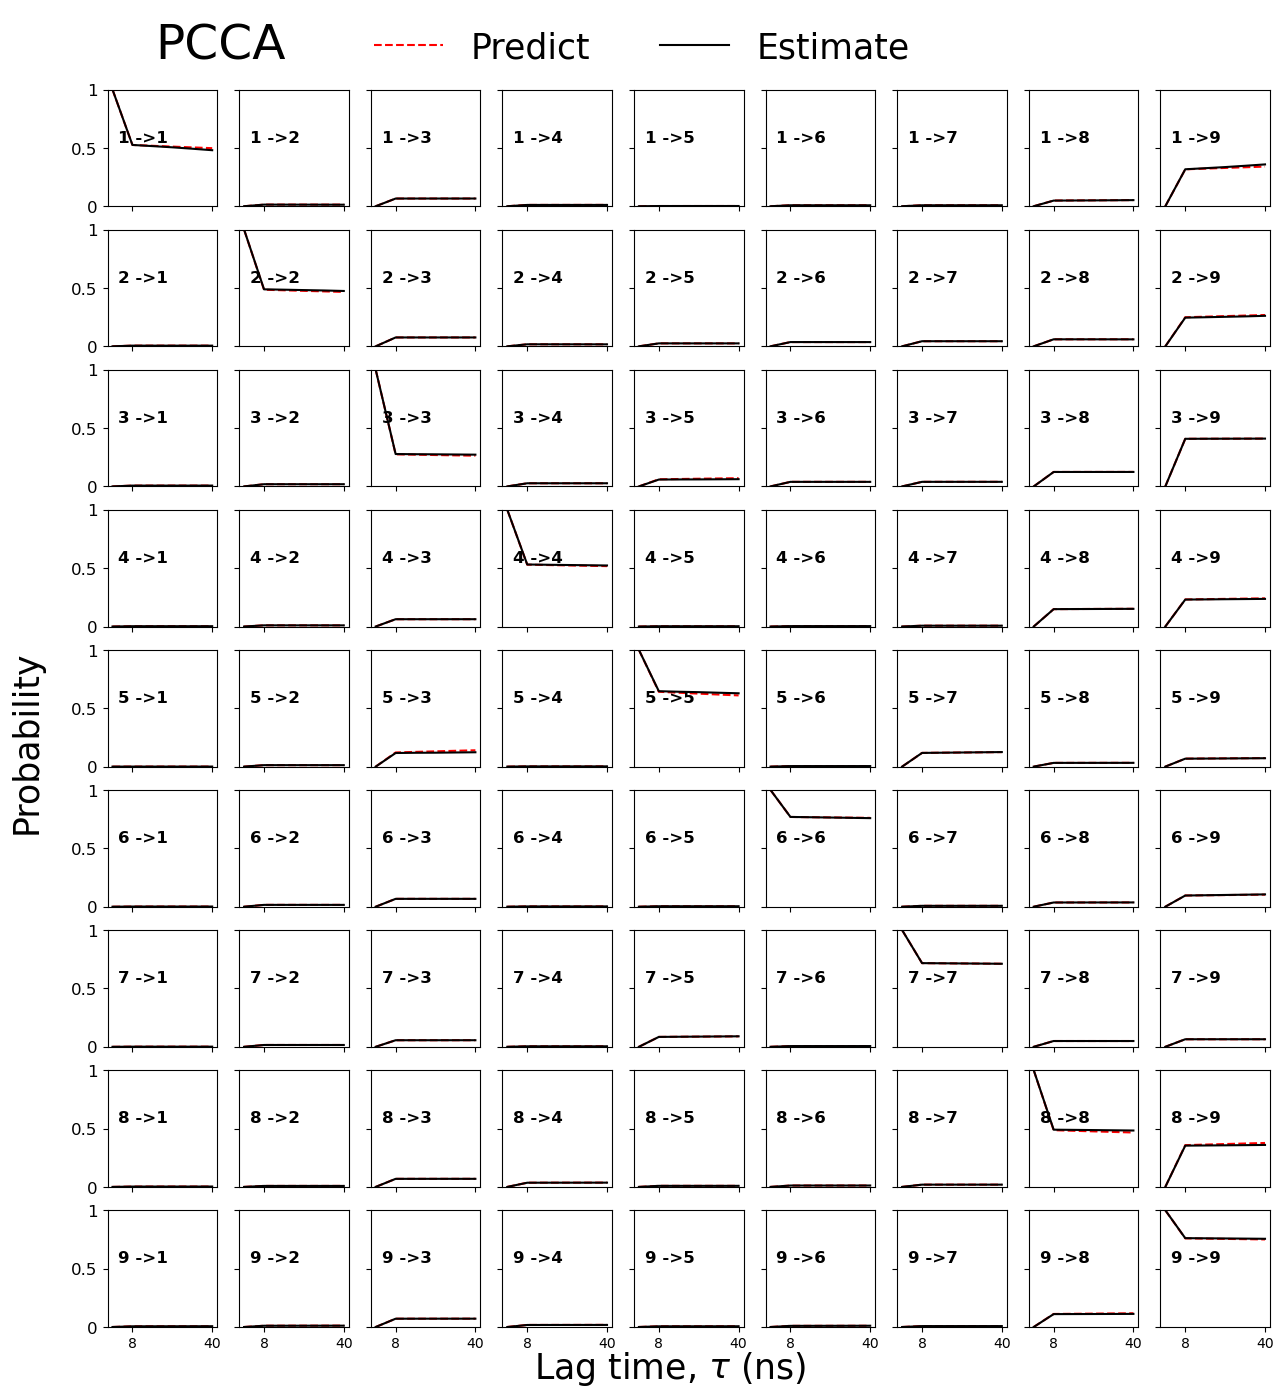

In [321]:
msm.reindex_msm(model_type = "hmm") #reindex msm's if needed
msm.cktest("hmm", predict_color = "skyblue")
msm.cktest("pcca")

In [322]:
# reindex CG markov states based on traj observable (total absolute writhe)
# make a new writhe instance to plot writhe matrices

msm.reindex_msm("hmm", obs = obs)
msm.reindex_msm("pcca", obs = obs)
dist_msm.reindex_msm("hmm", obs = obs)
dist_msm.reindex_msm("pcca", obs = obs)

 # Writhe MSM coarse grained model validation 

Text(0.5, 1.2, 'ACTR : Distance MSM')

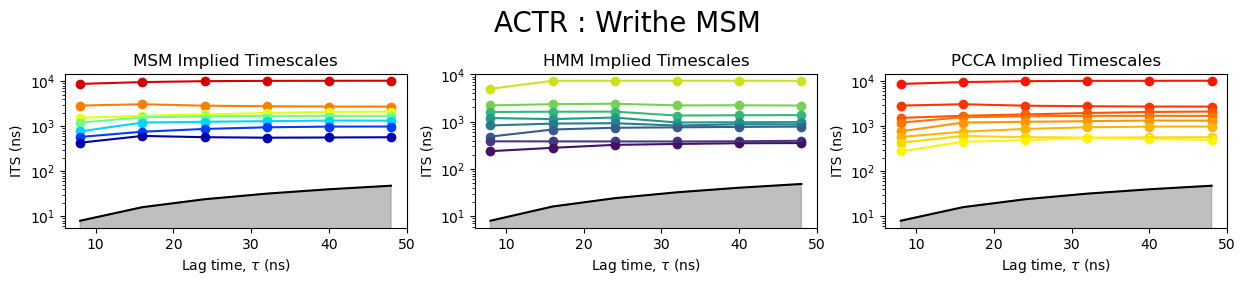

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

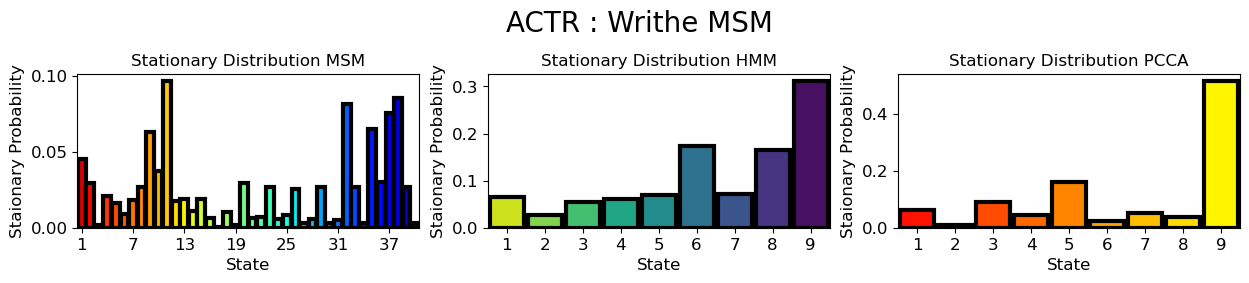

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

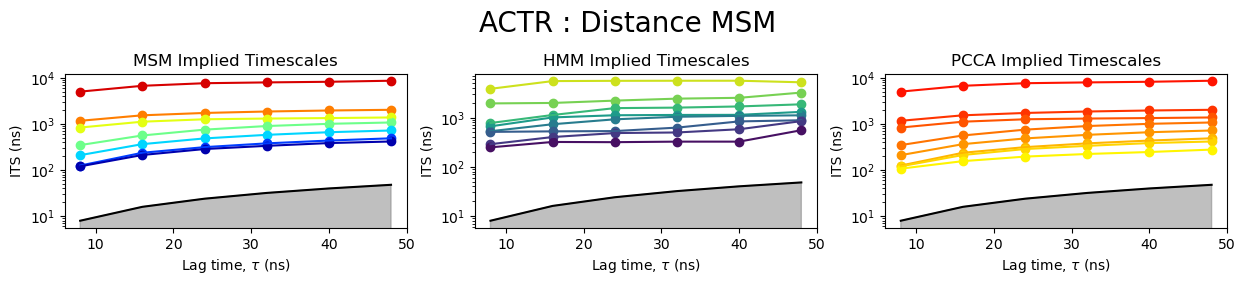

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

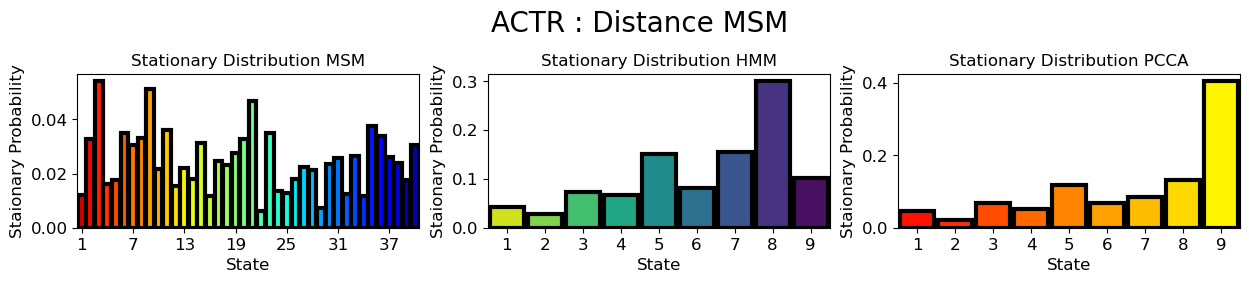

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [323]:
model_name = "Writhe"

# ITS
fig, axes = plt.subplots(1,3, figsize=(15,2))
cmaps = ["jet", "viridis", "autumn_r"]
for model, ax, cmap in zip("msm,hmm,pcca".split(","), axes.flat, cmaps):
    if model == "msm":
        n_its = 7
    else:
        n_its = None
    
    plt.figure()
    msm.its(model_type= model,
            ax=ax,
            n_its = n_its, 
            cmap=cmap)
plt.tight_layout()
fig.suptitle(f"{protein_name} : Writhe MSM",y=1.2, size=20)


#Stationary Distributions
fig, axes = plt.subplots(1,3, figsize=(15,2))
for model, ax,cmap in zip("msm,hmm,pcca".split(","), axes.flat, cmaps):
    plt.figure()
    if model == "msm":
        state_label_stride = 6
    else:
        state_label_stride = 1
    msm.stationary_distribution(model_type= model,
                                ax=ax,
                                cmap=cmap,
                                state_label_stride=state_label_stride)
plt.tight_layout()
fig.suptitle(f"{protein_name} : {model_name} MSM",y=1.2, size=20)

model_name = "Distance"

# ITS
fig, axes = plt.subplots(1,3, figsize=(15,2))
cmaps = ["jet", "viridis", "autumn_r"]
for model, ax, cmap in zip("msm,hmm,pcca".split(","), axes.flat, cmaps):
    if model == "msm":
        n_its = 7
    else:
        n_its = None
    
    plt.figure()
    dist_msm.its(model_type= model,
            ax=ax,
            n_its = n_its, 
            cmap=cmap)
plt.tight_layout()
fig.suptitle(f"{protein_name} : {model_name} MSM",y=1.2, size=20)


#Stationary Distributions
fig, axes = plt.subplots(1,3, figsize=(15,2))
for model, ax,cmap in zip("msm,hmm,pcca".split(","), axes.flat, cmaps):
    plt.figure()
    if model == "msm":
        state_label_stride = 6
    else:
        state_label_stride = 1
    dist_msm.stationary_distribution(model_type= model,
                                ax=ax,
                                cmap=cmap,
                                state_label_stride=state_label_stride)
plt.tight_layout()
fig.suptitle(f"{protein_name} : {model_name} MSM",y=1.2, size=20)

 # Writhe MSM coarse grained state visualization

In [327]:
# get coarse grained msm state indices                    
frames_cl_writhe_hmm = utils.group_by(msm.hmm["data"]["dtrajs"][0])
frames_cl_writhe_pcca = utils.group_by(msm.pcca["data"]["dtrajs"][0])
frames_cl_dist_hmm = utils.group_by(dist_msm.hmm["data"]["dtrajs"][0])
frames_cl_dist_pcca = utils.group_by(dist_msm.pcca["data"]["dtrajs"][0])

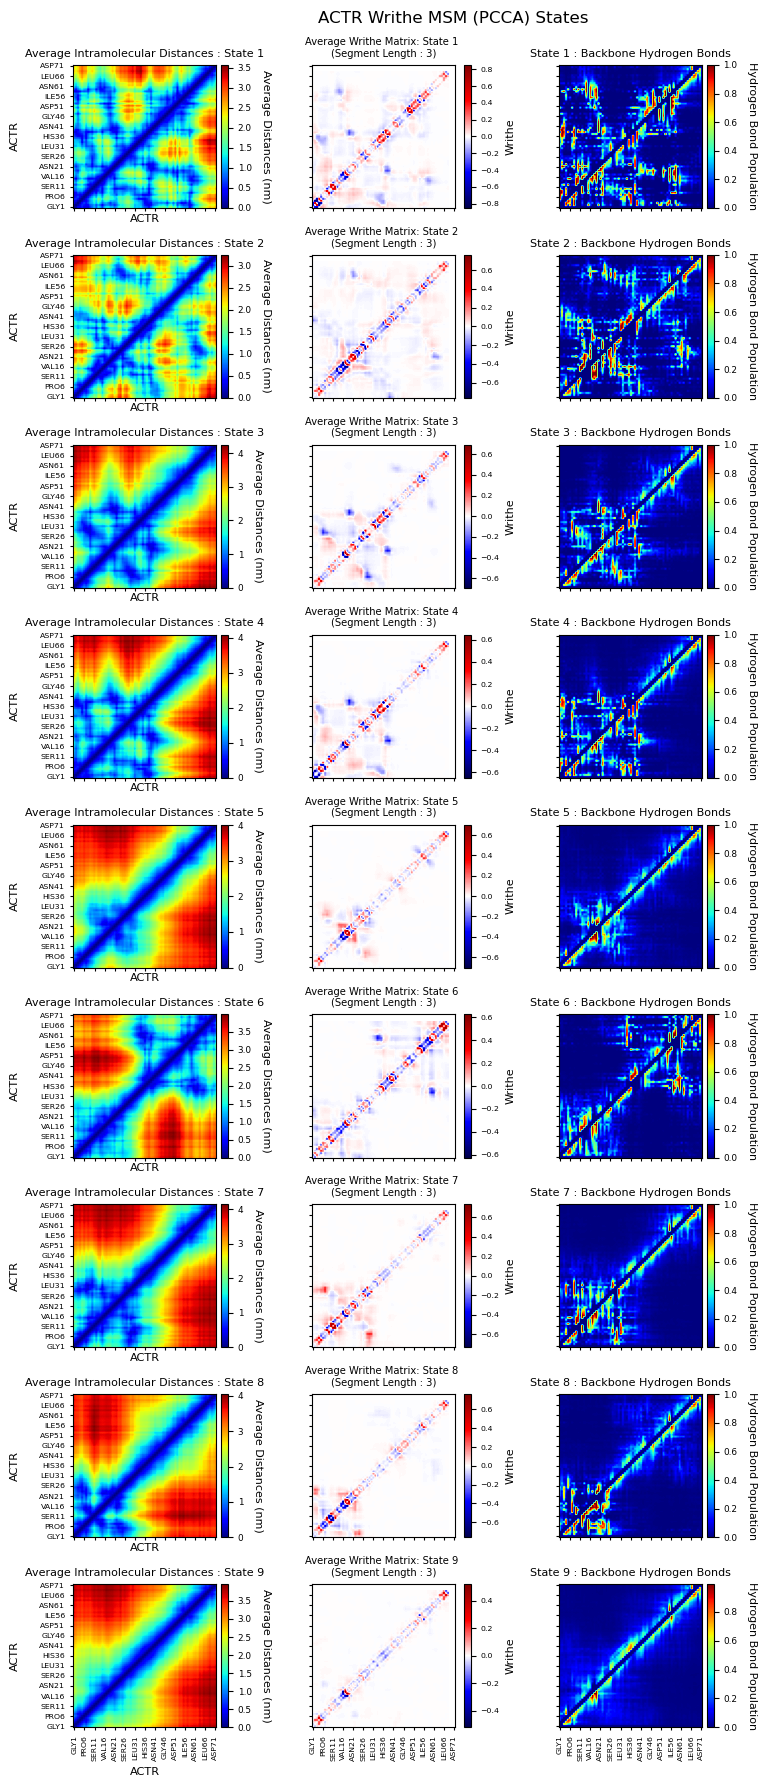

In [490]:
fig, axes = plt.subplots(9, 3, figsize=(8,18), sharex=True, sharey=True,)

for i, (ax, indices) in enumerate(zip(axes, frames_cl_writhe_pcca)):
    
    Distances.plot(index=indices, ax=ax[0], label_stride=10,
                  dscr = f"State {i+1}", font_scale=.8, )

    writhe.plot_writhe_matrix(index=indices, ax=ax[1], label_stride=10,
                              dscr = f"State {i+1}", font_scale=.8,
                              xticks = residues)

    mdtool.plot_distance_matrix(hbond[indices].mean(0),
                           title=f"State {i+1} : Backbone Hydrogen Bonds", 
                           xticks=residues,
                           yticks=residues,
                           cbar_label="Hydrogen Bond Population", 
                           label_stride=5,
                           ax=ax[2],
                           font_scale=.8,)


fig.suptitle("ACTR Writhe MSM (PCCA) States", y = .99,x=.6)
fig.tight_layout()
# fig2.tight_layout()

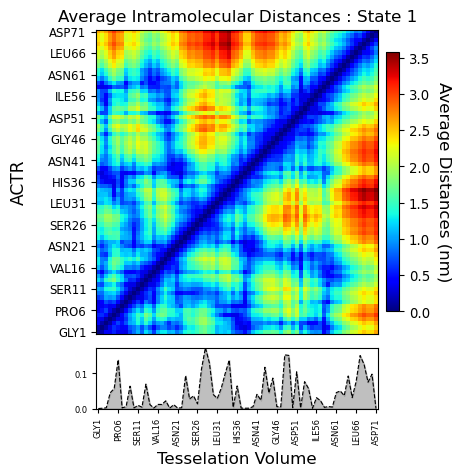

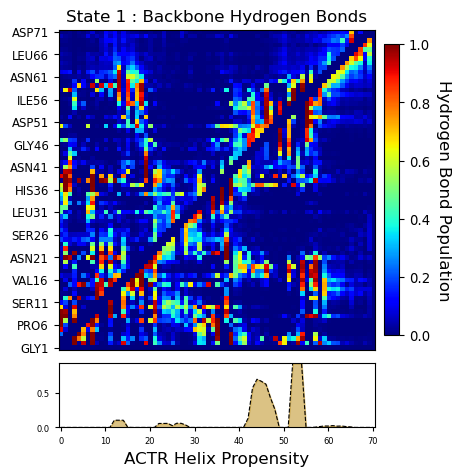

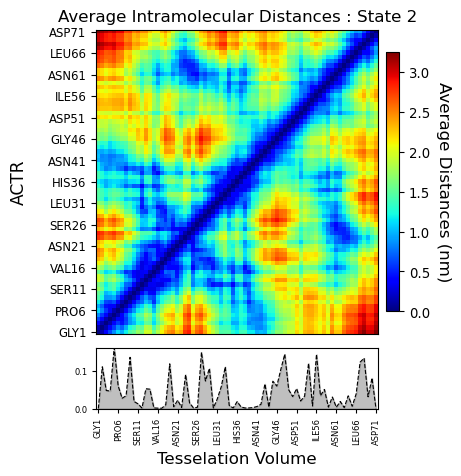

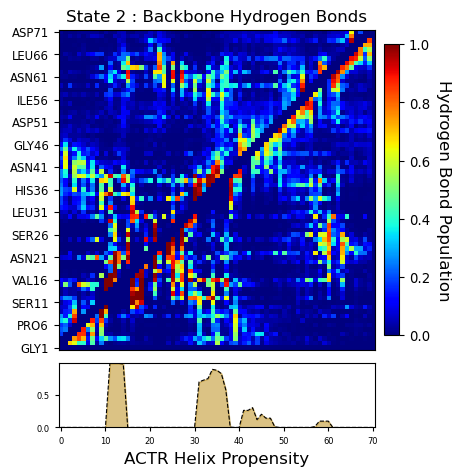

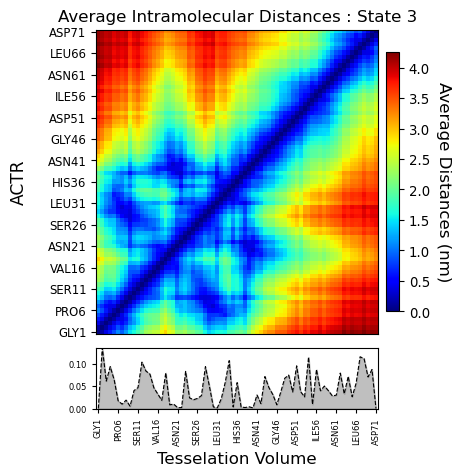

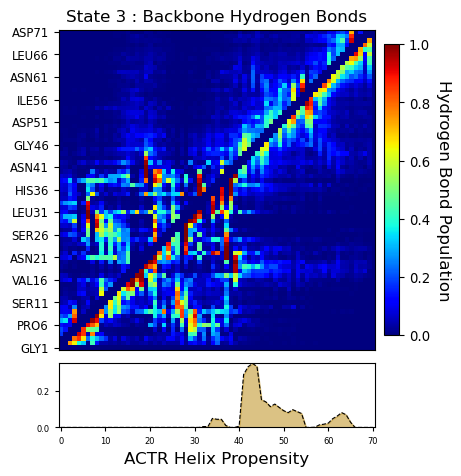

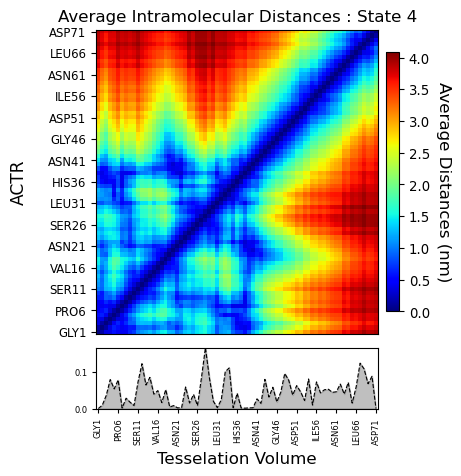

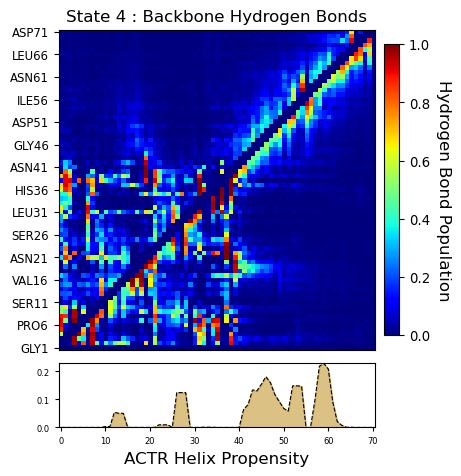

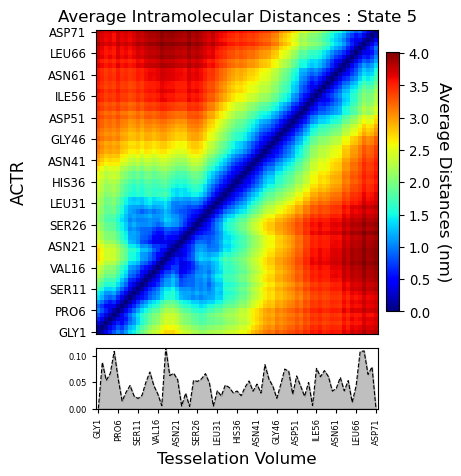

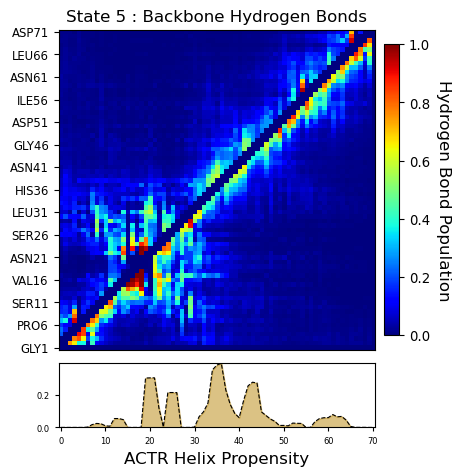

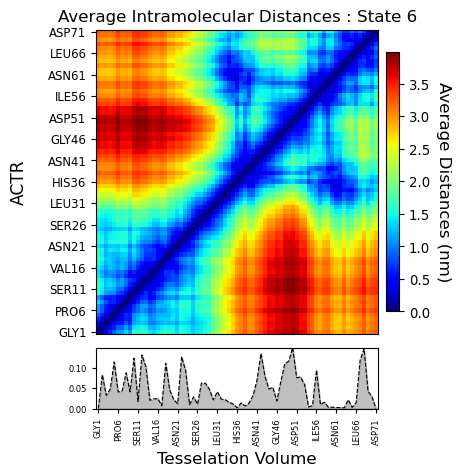

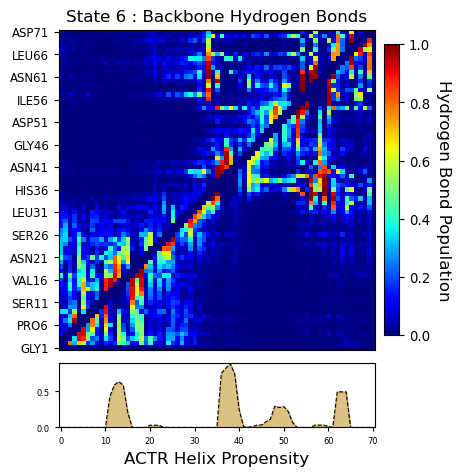

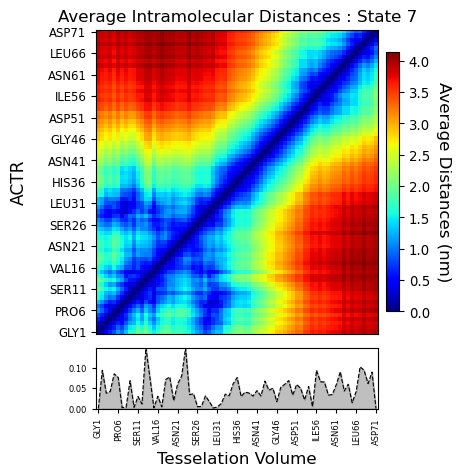

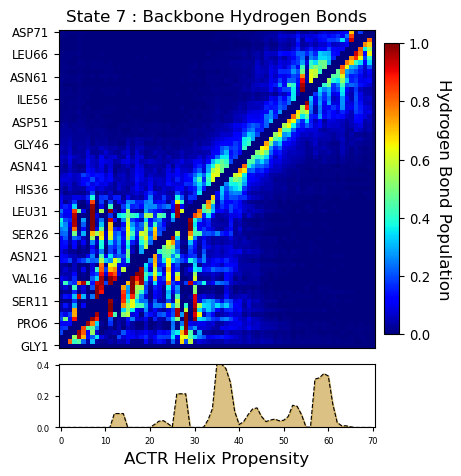

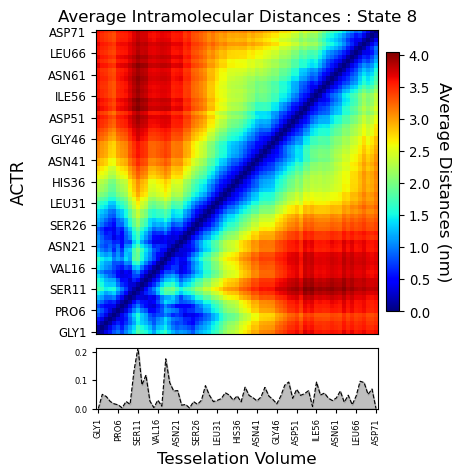

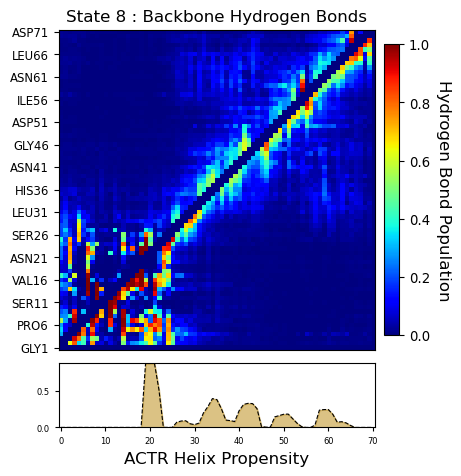

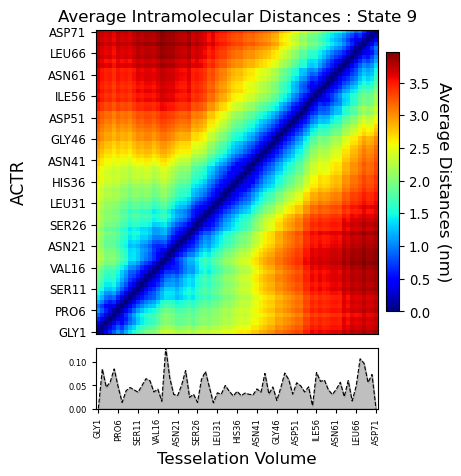

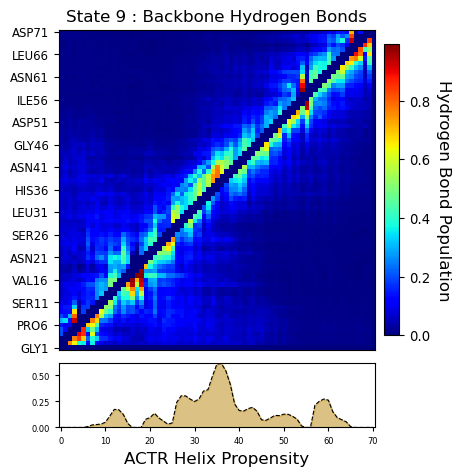

In [491]:
for i, indices in enumerate(frames_cl_writhe_pcca):
    Distances.plot(index=indices,
                   contacts=False,
                   contact_cut_off=.8,
                   dscr=f"State {i+1}",
                   label_stride=5,
                   line_plot_args={"y":voro_norm[indices].mean(0),
                                   "xlabel" : "Tesselation Volume",
                                   "ls":"--",
                                   "lw" : .8,
                                   "color":"black",
                                   "marker":None,
                                   "fill_color":"gray",
                                   "fill_alpha":.5,
                                   "label_stride":5,
                                   "ymax":voro_norm[indices].mean(0).max()})
    
    matrix_args = dict(matrix=hbond[indices].mean(0),
                         title=f"State {i+1} : Backbone Hydrogen Bonds",
                         hide_x=True,
                         yticks=residues,
                         cbar_label="Hydrogen Bond Population", 
                         label_stride=5,
                         font_scale=.8)
    
    line_args={"y":dssp[indices].mean(0),
               "x":np.arange(trj.n_residues),
               "xlabel" : "ACTR Helix Propensity",
               "ls":"--",
               "lw" : .8,
               "color":"black",
               "marker":None,
               "fill_color":"darkgoldenrod",
               "fill_alpha":.5,
               "label_stride":3,
               "ylabel_rotation":90,
               "ymax":dssp[indices].mean(0).max()}
    
    line_args["font_scale"] = 1
    line_args["hide_title"] = True
    matrix_args["font_scale"] = 1.2
    matrix_args["hide_x"] = True
    matrix_args["xlabel"] = None
    matrix_args["xticks"] = None
    matrix_args["aspect"] = "auto"
    
    mdtool.build_grid_plot(matrix_args, line_args)


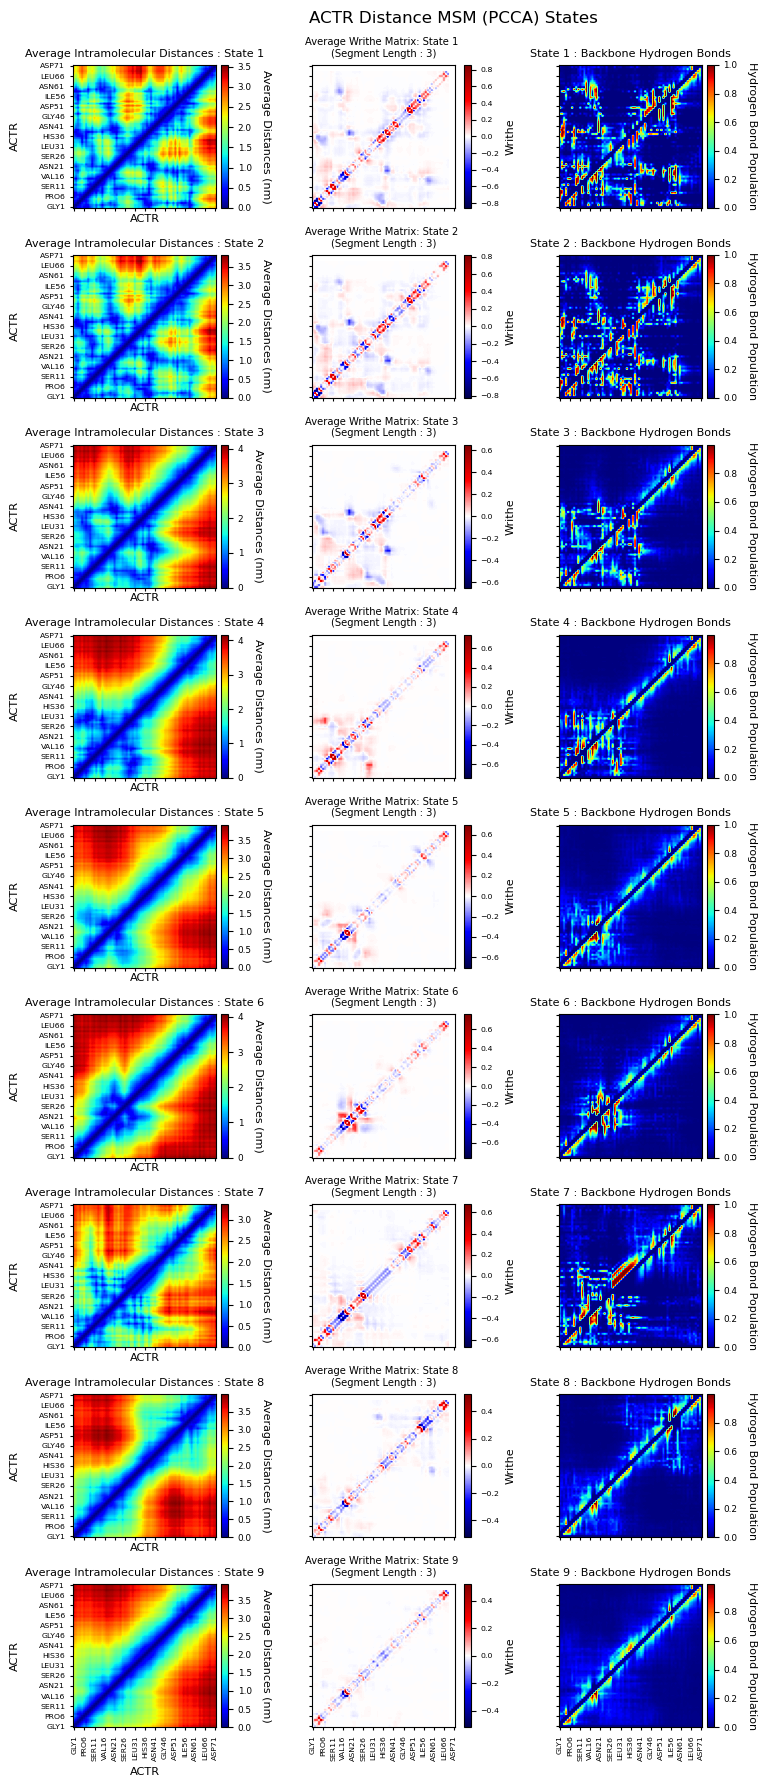

In [441]:
fig, axes = plt.subplots(9, 3, figsize=(8,18), sharex=True, sharey=True,)

for i, (ax, indices) in enumerate(zip(axes, frames_cl_dist_pcca)):
    
    Distances.plot(index=indices, ax=ax[0], label_stride=10,
                  dscr = f"State {i+1}", font_scale=.8, )

    writhe.plot_writhe_matrix(index=indices, ax=ax[1], label_stride=10,
                              dscr = f"State {i+1}", font_scale=.8,
                              xticks = residues)

    mdtool.plot_distance_matrix(hbond[indices].mean(0),
                           title=f"State {i+1} : Backbone Hydrogen Bonds", 
                           xticks=residues,
                           yticks=residues,
                           cbar_label="Hydrogen Bond Population", 
                           label_stride=5,
                           ax=ax[2],
                           font_scale=.8,)


fig.suptitle("ACTR Distance MSM (PCCA) States", y = .99,x=.6)
fig.tight_layout()
# fig2.tight_layout()

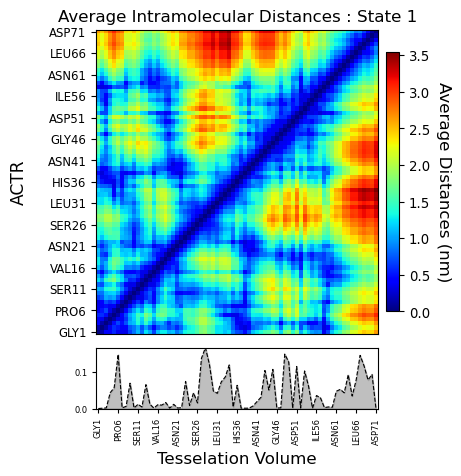

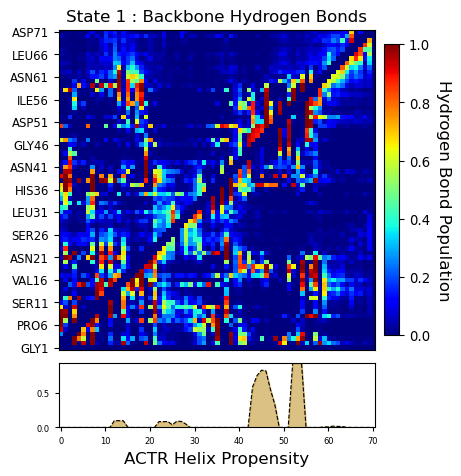

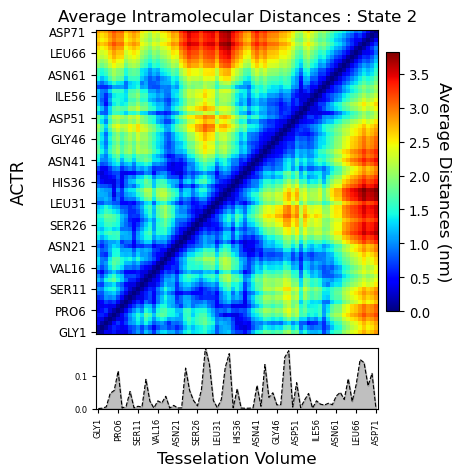

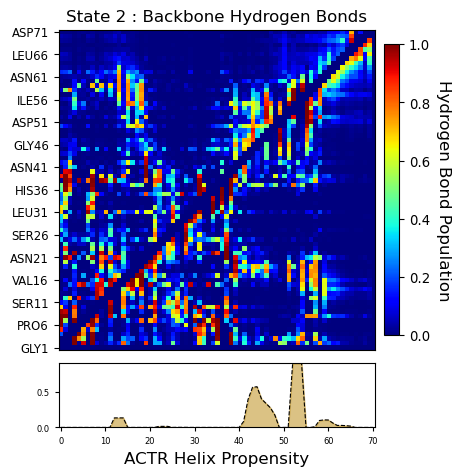

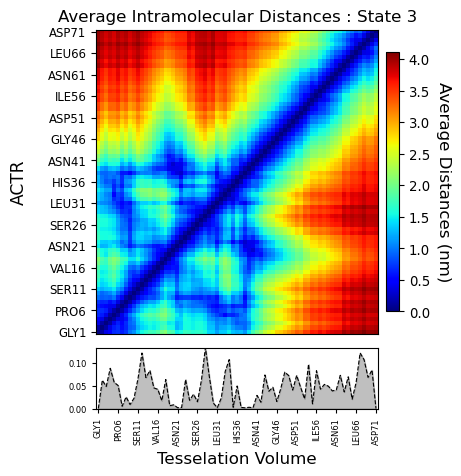

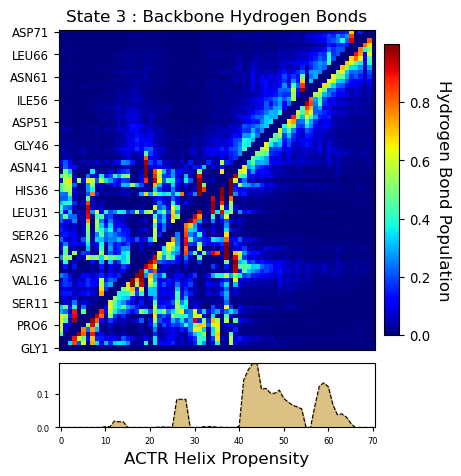

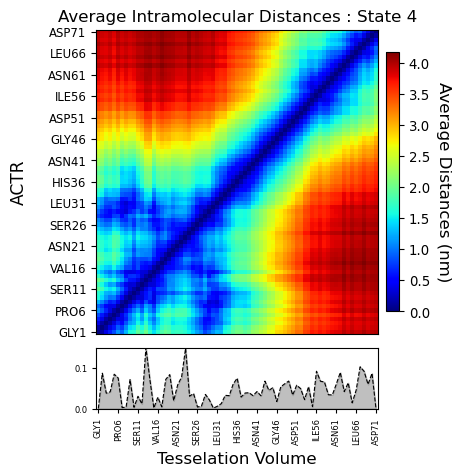

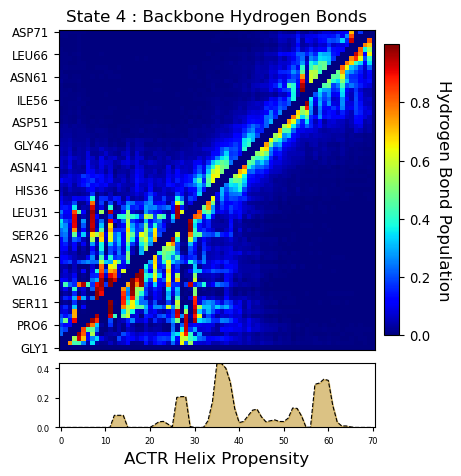

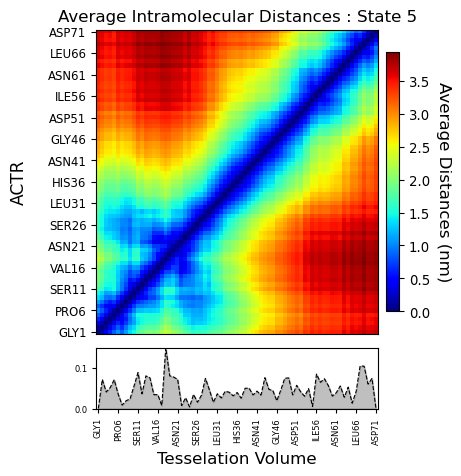

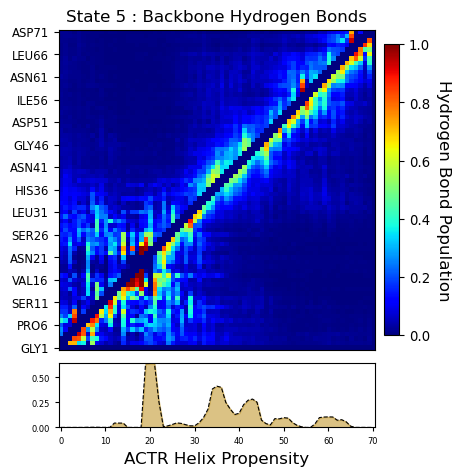

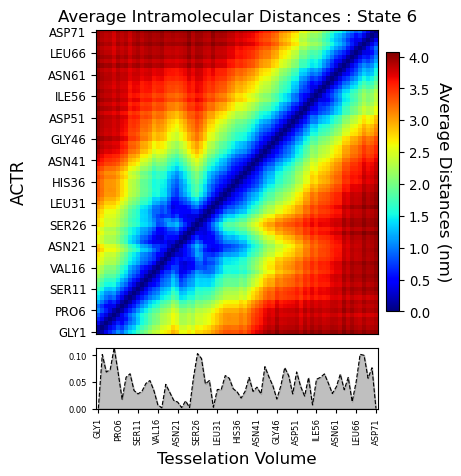

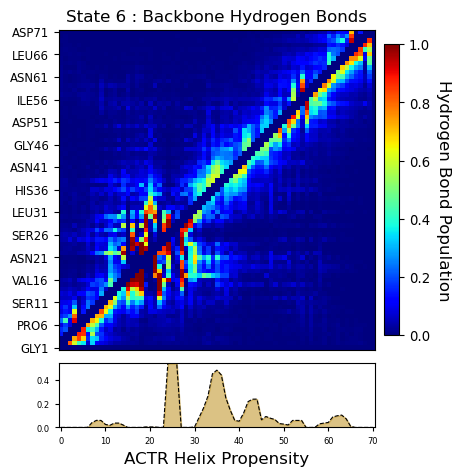

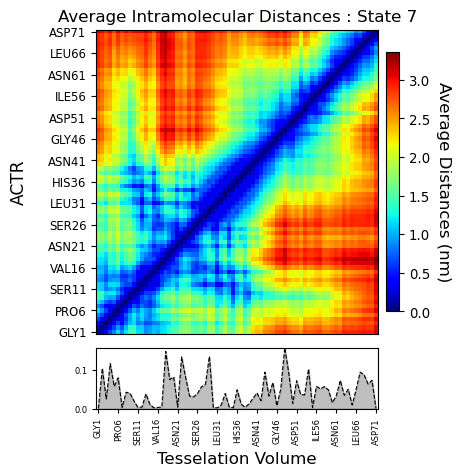

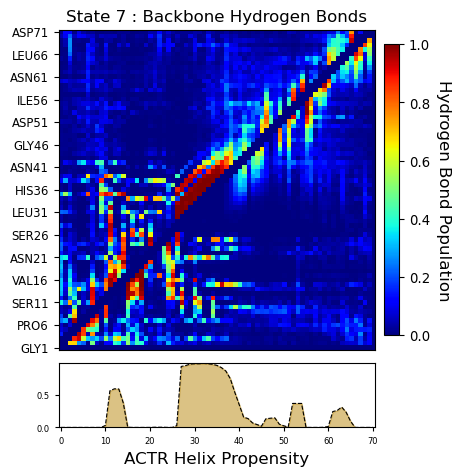

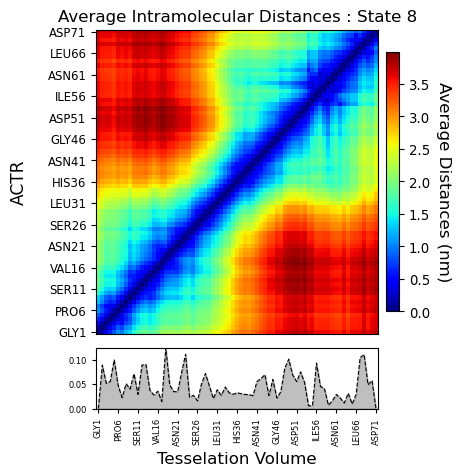

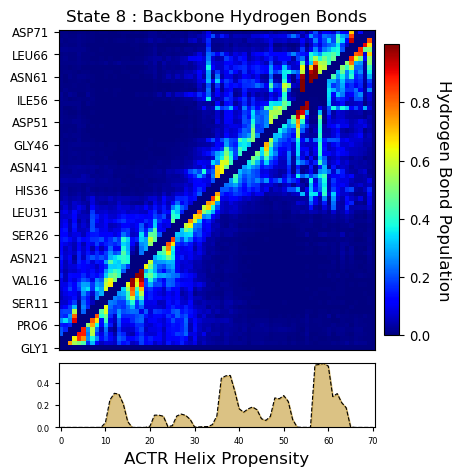

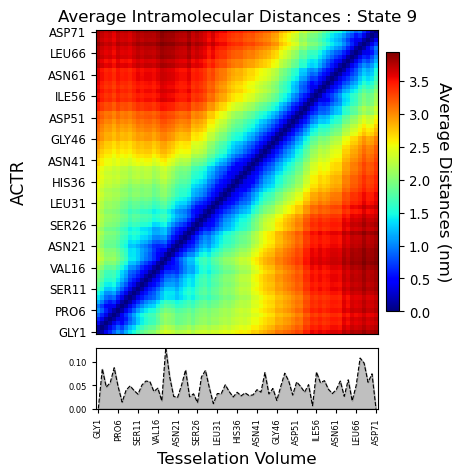

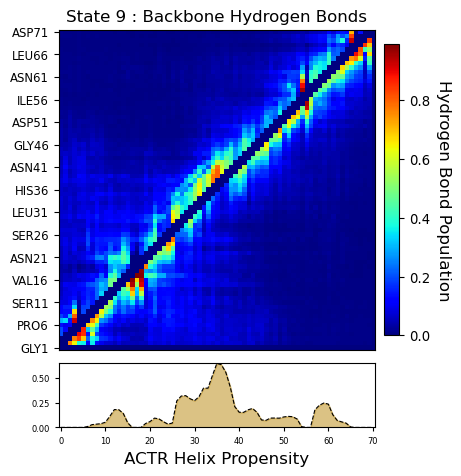

In [443]:
for i, indices in enumerate(frames_cl_dist_pcca):
    Distances.plot(index=indices,
                   contacts=False,
                   contact_cut_off=.8,
                   dscr=f"State {i+1}",
                   label_stride=5,
                   line_plot_args={"y":voro_norm[indices].mean(0),
                                   "xlabel" : "Tesselation Volume",
                                   "ls":"--",
                                   "lw" : .8,
                                   "color":"black",
                                   "marker":None,
                                   "fill_color":"gray",
                                   "fill_alpha":.5,
                                   "label_stride":5,
                                   "ymax":voro_norm[indices].mean(0).max()})
    
    matrix_args = dict(matrix=hbond[indices].mean(0),
                         title=f"State {i+1} : Backbone Hydrogen Bonds",
                         hide_x=True,
                         yticks=residues,
                         cbar_label="Hydrogen Bond Population", 
                         label_stride=5,
                         font_scale=.8)
    
    line_args={"y":dssp[indices].mean(0),
               "x":np.arange(trj.n_residues),
               "xlabel" : "ACTR Helix Propensity",
               "ls":"--",
               "lw" : .8,
               "color":"black",
               "marker":None,
               "fill_color":"darkgoldenrod",
               "fill_alpha":.5,
               "label_stride":3,
               "ylabel_rotation":90,
               "ymax":dssp[indices].mean(0).max()}
    
    line_args["font_scale"] = 1
    line_args["hide_title"] = True
    matrix_args["font_scale"] = 1.2
    matrix_args["hide_x"] = True
    matrix_args["xlabel"] = None
    matrix_args["xticks"] = None
    matrix_args["aspect"] = "auto"
    
    mdtool.build_grid_plot(matrix_args, line_args)


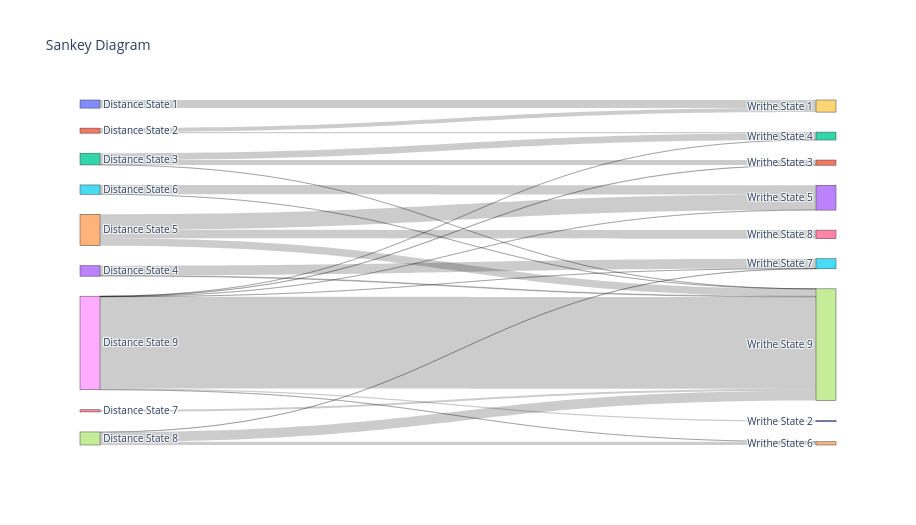